### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
###Amit Sinha

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
dfitem = pd.read_csv('item.csv')
dfuser = pd.read_csv('user.csv')
dfdata = pd.read_csv('data.csv')


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
dfdic = {'item':dfitem , 'user':dfuser , 'data':dfdata}
for key , df in dfdic.items():
    print('----- Data Set {} ----'.format(key))
    print(f' shape = {df.shape}' )
    print(df.info())
    print(df.describe().T)
    nullfound = df.isna().sum().sum()
    print(f'Null count for Dataframe = {nullfound}')
    
    print('\n')
    

print(f"DF_ITEM duplicated : {dfitem.duplicated(['movie id']).sum()}")

print(f"DF_USER duplicated : {dfuser.duplicated(['user id']).sum()}")

----- Data Set item ----
 shape = (1681, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci

#### 4. Find the number of movies per genre using the item data - 5 marks

In [4]:
# use sum on the default axis
itemcols = sorted( set(dfitem.columns)- {'movie id','movie title','release date'})
movie_per_genre = dfitem[itemcols].sum( axis=0)
print(f'Movies per genre :\n{movie_per_genre}')




Movies per genre :
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
unknown          1
dtype: int64


#### 5. Find the movies that have more than one genre - 2.5 marks

----- movies with more than one genre -----
count = 849
             movie title  genre_count
0             Toy Story             3
1             GoldenEye             3
3            Get Shorty             3
4               Copycat             3
6        Twelve Monkeys             2
7                  Babe             3
9           Richard III             2
10        Seven (Se7en)             2
11  Usual Suspects, The             2
13          Postino, Il             2


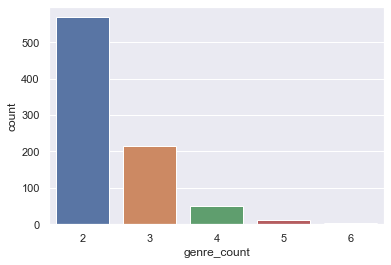

In [5]:
#hint: use sum on the axis = 1
dfitem['genre_count'] = dfitem[itemcols].sum(axis =1)
movies_multiple_genre = dfitem[dfitem.genre_count >1]
print('----- movies with more than one genre -----')
print(f'count = {movies_multiple_genre.shape[0]}')
print(movies_multiple_genre.head(10)[['movie title','genre_count']])

sns.countplot(movies_multiple_genre.genre_count)




#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [6]:
print(f'size before {dfitem.shape}')
print(dfitem[dfitem.unknown ==1].T)

dfitem_cleaned = dfitem[dfitem.unknown==0]
print(f'size after {dfitem_cleaned.shape}')


size before (1681, 23)
                       1371
movie id               1373
movie title   Good Morning 
release date     4-Feb-1971
unknown                   1
Action                    0
Adventure                 0
Animation                 0
Childrens                 0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Fantasy                   0
Film-Noir                 0
Horror                    0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Thriller                  0
War                       0
Western                   0
genre_count               1
size after (1680, 23)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [7]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.



In [8]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


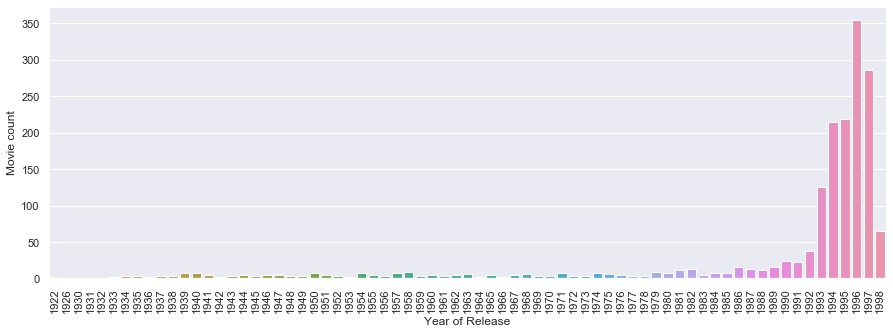

In [9]:
#your answers here


### release year
dfitem['release_year']= dfitem['release date'].str[-4:]
dfitem['release_year'] = pd.to_numeric(dfitem['release_year'])
plt.figure(figsize=(15,5))
sns.countplot(x = 'release_year' , data = dfitem   )
plt.xticks( rotation= 90 )
plt.xlabel("Year of Release")
plt.ylabel("Movie count")
### Conclusion: The Drop in 1998 shows that probably the data for 1998 is incomplete 
### 1990s is the golden decade


#joined dataframe
dfjoin = pd.merge(left = dfdata , right = dfuser ,how = 'outer' ,on = 'user id')
dfjoin = pd.merge(left = dfjoin , right = dfitem ,how = 'outer' ,on = 'movie id')
dfjoin['decade'] = (dfjoin['release_year'] ) //10 *10









Text(0.5, 1.0, 'Female Viewers Ratio  by year')

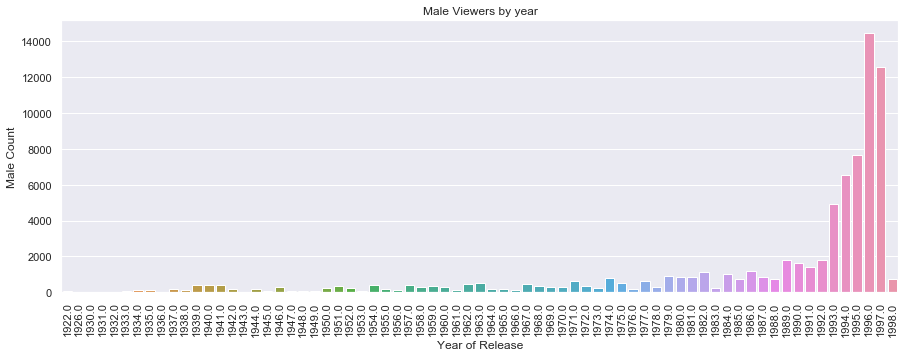

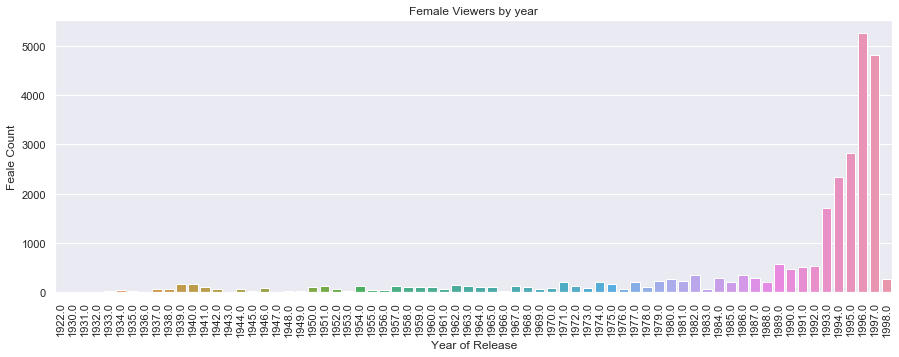

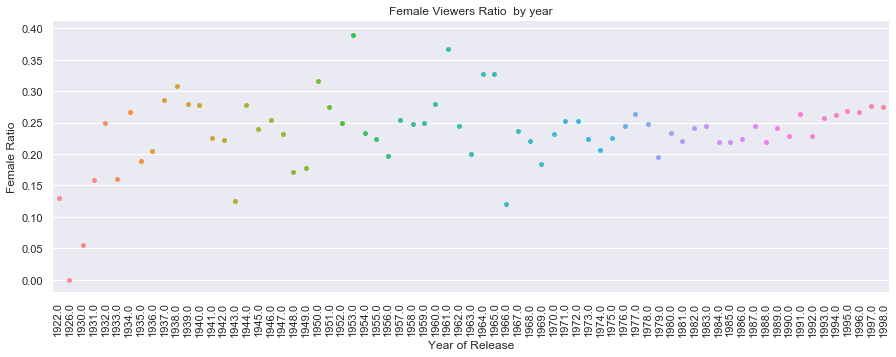

In [10]:
#### Gender
plt.figure(figsize=(15,5))
sns.countplot(x = 'release_year' , data = dfjoin[dfjoin.gender=='M']   )
plt.ylabel("Male Count")
plt.xticks( rotation= 90 )
plt.xlabel("Year of Release")
plt.title("Male Viewers by year")

plt.figure(figsize=(15,5))
sns.countplot(x = 'release_year' , data = dfjoin[dfjoin.gender=='F']  )
plt.ylabel("Feale Count")
plt.xticks( rotation= 90 )
plt.xlabel("Year of Release")
plt.title("Female Viewers by year")


# Better plot of percent of Females by year
gender_by_year = pd.DataFrame(dfjoin.groupby(by=['release_year','gender'])['timestamp'].count())
gender_by_year.columns =['viewer_count']
gender_by_year= gender_by_year.unstack(fill_value=0)
gender_by_year['F'] = gender_by_year.viewer_count.F/(gender_by_year.viewer_count.F+gender_by_year.viewer_count.M)
gender_by_year['M'] = gender_by_year.viewer_count.M/(gender_by_year.viewer_count.F+gender_by_year.viewer_count.M)

gender_by_year = gender_by_year.reset_index()

plt.figure(figsize=(15,5))
sns.stripplot( x = gender_by_year.release_year , y = gender_by_year.F  )
plt.ylabel("Female Ratio")
plt.xticks( rotation= 90 )
plt.xlabel("Year of Release")
plt.title("Female Viewers Ratio  by year")

####COnclusion: Female percentage has been constant 


Text(0.5, 1.0, 'mean(Age)  by year')

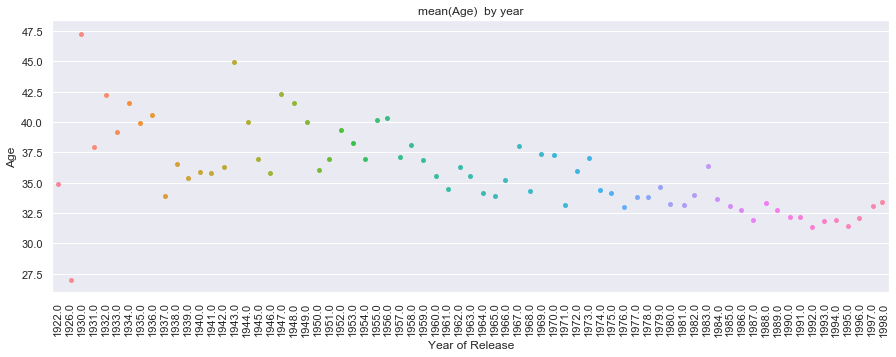

In [11]:
#Age
age_by_year=  pd.DataFrame(dfjoin.groupby(by=['release_year'])['age'].mean()).reset_index()
plt.figure(figsize=(15,5))
sns.stripplot( x = age_by_year.release_year , y = age_by_year.age  )
plt.ylabel("Age")
plt.xticks( rotation= 90 )
plt.xlabel("Year of Release")
plt.title("mean(Age)  by year")
#conclusion Average Age drifting down over years




Text(0.5, 1.0, "Viewer's occupation over decades")

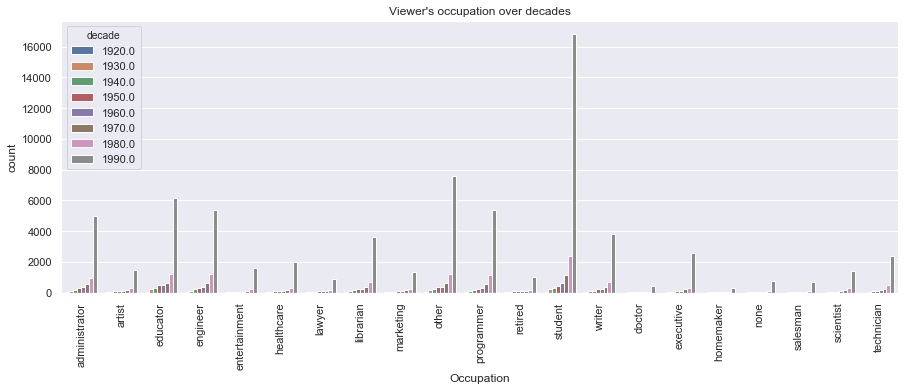

In [32]:
#Occupation
occupation_decade = pd.DataFrame(dfjoin.groupby(by=['decade','occupation'])['timestamp'].count()).reset_index()
occupation_decade.columns =['decade' , 'occupation','count']

plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='count', data = occupation_decade , hue = 'decade')
plt.ylabel("count")
plt.xticks( rotation= 90 )
plt.xlabel("Occupation")
plt.title("Viewer's occupation over decades")

##conculsion: students have grown into the biggest section of viewers

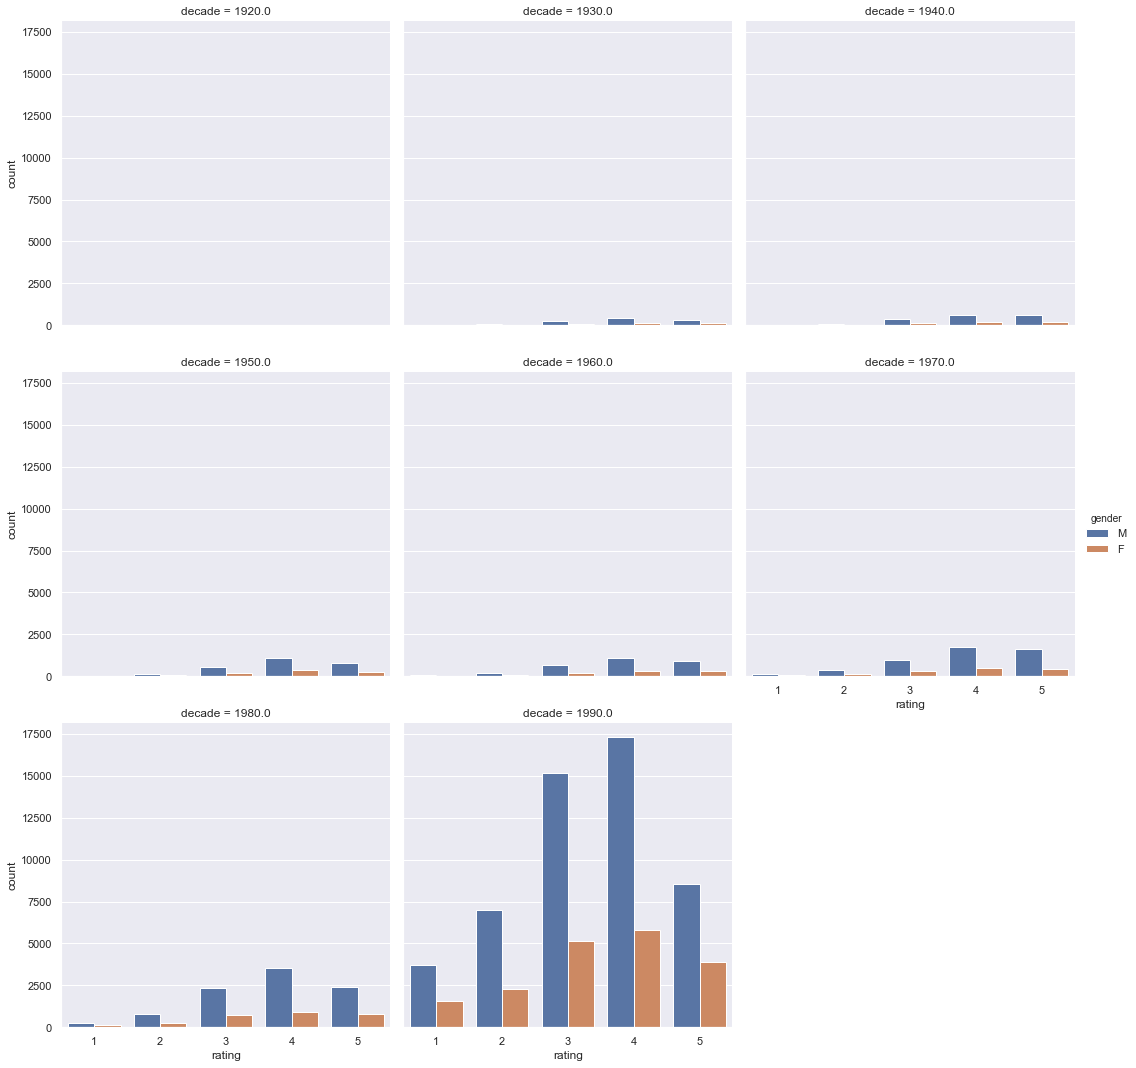

In [41]:
### Rating

sns.catplot(x='rating',  kind = 'count' , data = dfjoin  ,col = 'decade', col_wrap=3, hue='gender')


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

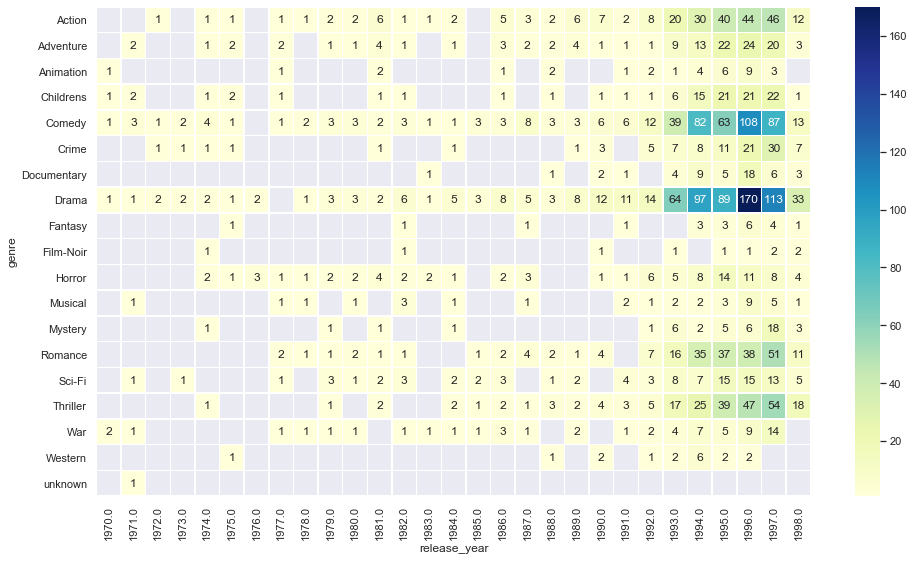

In [62]:
#Your answer here
columns = set(dfitem.columns) - {'movie id', 'movie title','release date','genre_count'}
year_genre = dfitem[columns].groupby(by='release_year').sum()

#now convert the above data set into year , genre , count
columns  = set(year_genre.columns)
year_df = pd.DataFrame()
years = set(year_genre.index.unique())
for year in years:
    for genre in columns:
        if year_genre.loc[year][genre] >0:
            year_df= year_df.append({'release_year':year , 'genre':genre, 'movies':year_genre.loc[year][genre]}, ignore_index = True )

year_df = year_df[year_df.release_year>=1970].pivot('genre','release_year','movies')

plt.figure(figsize=(16,9))
sns.heatmap(year_df,annot=True,linewidth = 0.5, cmap="YlGnBu",fmt='.0f' )

###Conclusion Romance , Action , Drama , Comedy , War dominate 
### Romance is the growing category 

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [63]:
#your answer here
print(f'---- RATINGS DETAILS ---\n{dfdata.rating.describe()}')
movies_count = dfdata['movie id'].value_counts() >100  # movies with more than 100 data items
movie_set = set(movies_count.index)
dfjoin100 = dfjoin[ dfjoin['movie id'].isin(movie_set)] # enrichd movie set filtered by movies with >100 ratings
groupby = dfjoin100[['movie title','rating']].groupby(by = 'movie title' ).agg(np.mean)
groupby.sort_values(by='rating', ascending = False, inplace = True)
groupby.head(25) # Top 25 movies based on ratings ; such that there are at least 100 rating records


---- RATINGS DETAILS ---
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


,rating
movie title,
"Great Day in Harlem, A",5.000000
Prefontaine,5.000000
Someone Else's America,5.000000
Marlene Dietrich: Shadow and Light (,5.000000
Entertaining Angels: The Dorothy Day Story,5.000000
Star Kid,5.000000
They Made Me a Criminal,5.000000
Aiqing wansui,5.000000
"Saint of Fort Washington, The",5.000000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [109]:
#dfgender = dfjoin[(dfjoin.release_year>1990 )].groupby(by='gender').sum()
dfgender = dfjoin.groupby(by='gender').sum()
cols = set(dfgender.columns) -{'user id','movie id','rating','timestamp','age','genre_count','release_year','decade'}
dfgender['total']=dfgender[cols].sum(axis=1)


# Do Men watch more drama than women?
dfdrama = dfgender[['Drama','total']].copy()
dfdrama['drama_percent'] =dfdrama.Drama/dfdrama.total
print(dfdrama.head())
print( "Do Men watch more drama than women? False")

# Women watch more Sci-Fi than men?
dfsci = dfgender[['Sci-Fi','total']].copy()
dfsci['sci_fi_percent'] =dfsci['Sci-Fi']/dfsci.total
print(dfsci.head())
print( "Women watch more Sci-Fi than men? False")


# Men watch more Romance than women
dfrom = dfgender[['Romance','total']].copy()
dfrom['romance_percent'] =dfrom['Romance']/dfrom.total
print(dfrom.head())
print( "Men watch more Romance than women? False")



          Drama     total  drama_percent
gender                                  
F       11008.0   53701.0       0.204987
M       28887.0  158885.0       0.181811
Do Men watch more drama than women? False
         Sci-Fi     total  sci_fi_percent
gender                                   
F        2629.0   53701.0        0.048956
M       10101.0  158885.0        0.063574
Women watch more Sci-Fi than men? False
        Romance     total  romance_percent
gender                                    
F        5858.0   53701.0         0.109085
M       13603.0  158885.0         0.085615
Men watch more Romance than women? False
